In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.preprocessing import StandardScaler

In [77]:
train = pd.read_csv("dataset/train_redu.csv")

test = pd.read_csv("dataset/test_redu.csv")

In [3]:
train.head()

,label,intensidade,simetria
0,0,145.435294,148.572549
1,0,118.576471,137.113725
2,0,127.600000,134.047059
3,0,138.047059,151.003922
4,0,146.215686,122.501961


In [4]:
test.head()

,label,intensidade,simetria
0,0,147.933333,130.470588
1,0,131.054902,122.721569
2,0,134.890196,151.725490
3,0,139.976471,133.921569
4,0,129.580392,130.274510


In [5]:
def filtrar_digitos(train, test, digito1, digito2):
    """
    Filtra os dados de treino e teste para conter apenas dois dígitos específicos.

    Parâmetros:
        train (pd.DataFrame): Dataset de treino com colunas ['label', 'intensidade', 'simetria'].
        test (pd.DataFrame): Dataset de teste com colunas ['label', 'intensidade', 'simetria'].
        digito1 (int): Primeiro dígito para análise (ex: 1).
        digito2 (int): Segundo dígito para análise (ex: 5).
    
    Retorna:
        (train_filtrado, test_filtrado): DataFrames filtrados contendo apenas os dois dígitos.
    """
    selecionados = [digito1, digito2]
    
    train_filtrado = train[train['label'].isin(selecionados)]
    test_filtrado = test[test['label'].isin(selecionados)]
    
    # Resetar índices para evitar problemas depois
    return train_filtrado.reset_index(drop=True), test_filtrado.reset_index(drop=True)

In [75]:
def plot_reta_decisao_regressao(modelo, cor, label):
    # Coeficiente e intercepto
    coef = modelo.coef_
    intercepto = modelo.intercept_

    # Garante que coef é um vetor de 2 dimensões
    if coef.ndim == 2:
        coef = coef[0]
    if hasattr(intercepto, '__len__'):
        intercepto = intercepto[0]

    # Verifica se temos duas features (x e y)
    if len(coef) != 2:
        print(f"[ERRO] O modelo não tem dois coeficientes: {coef}")
        return

    # Faixa de valores de x
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = -(coef[0] * x_vals + intercepto) / coef[1]

    plt.plot(x_vals, y_vals, color=cor, label=label)


In [ ]:
def plot_reta_decisao_perceptron(modelo, cor, label):
    coef = modelo.coef_[0]
    intercepto = modelo.intercept_[0]
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = -(coef[0] * x_vals + intercepto) / coef[1]
    plt.plot(x_vals, y_vals, color=cor, label=label)



In [78]:
train, test = filtrar_digitos(train, test, 1, 5)


In [14]:
# caso queira salvar os dataframes filtrados

#train1x5.to_csv('train1x5.csv', index=False)
#test1x5.to_csv('test1x5.csv', index=False)

In [15]:
train.head()

,label,intensidade,simetria
0,1,44.701961,69.270588
1,1,59.850980,83.443137
2,1,48.552941,79.043137
3,1,69.435294,72.878431
4,1,51.541176,84.611765


In [17]:
test.head()

,label,intensidade,simetria
0,1,51.639216,71.443137
1,1,51.674510,85.050980
2,1,44.847059,72.674510
3,1,50.760784,81.945098
4,1,57.788235,72.564706


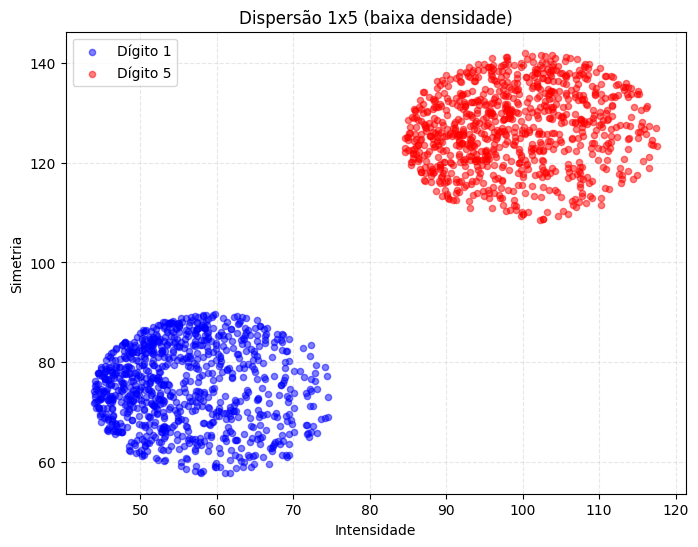

In [79]:
plt.figure(figsize=(8, 6))

# Juntar os dados (opcional, mas deixa o gráfico mais completo e com baixa densidade)
dados_plot = pd.concat([train, test])

# Separar os dígitos
digito1 = dados_plot[dados_plot['label'] == 1]
digito5 = dados_plot[dados_plot['label'] == 5]

# Plotar dígito 1 (azul)
plt.scatter(digito1['intensidade'], digito1['simetria'], 
            color='blue', label='Dígito 1', alpha=0.5, s=20)

# Plotar dígito 5 (vermelho)
plt.scatter(digito5['intensidade'], digito5['simetria'], 
            color='red', label='Dígito 5', alpha=0.5, s=20)

plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Dispersão 1x5 (baixa densidade)')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

In [80]:
# X: vetor com as duas features
X = train[['intensidade', 'simetria']].values

# y: +1 para label 1, -1 para label 5
y = train['label'].apply(lambda x: 1 if x == 1 else -1).values


In [81]:
X_test = test[['intensidade', 'simetria']].values

# y: vetor com os labels correspondentes (1 ou 5)
y_test = test['label'].values

In [82]:
# Converter os labels para +1 e -1, por exemplo:
digito_positivo = 1
digito_negativo = 5
y_test_bin = [1 if label == digito_positivo else -1 for label in y_test]

In [84]:
# Regressão Linear
modelo_lr = LinearRegression()
modelo_lr.fit(X, y)


LinearRegression()

In [85]:
modelo_log = LogisticRegression()
modelo_log.fit(X, y)


LogisticRegression()

In [86]:
y_pred_perceptron = modelo_perc.predict(X_test)
y_pred_regressao_linear = modelo_lr.predict(X_test)
y_pred_regressao_logistica= modelo_log.predict(X_test)


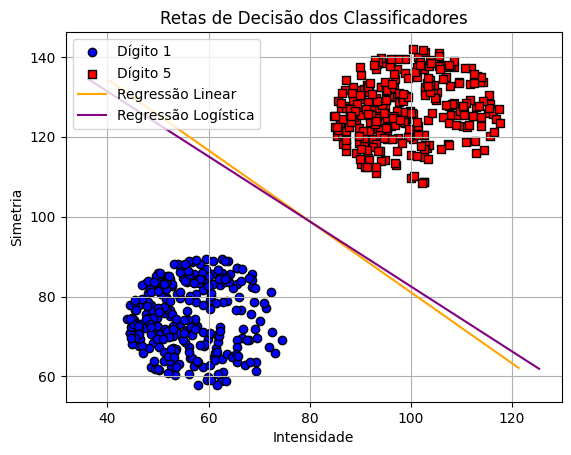

In [87]:
import matplotlib.pyplot as plt

# 1. Plotar os pontos de teste (X_test tem 2 colunas: intensidade e simetria)
for i, cor, marcador in zip([1, 5], ['blue', 'red'], ['o', 's']):
    idx = y_test == i
    plt.scatter(X_test[idx, 0], X_test[idx, 1], 
                c=cor, label=f'Dígito {i}', marker=marcador, edgecolors='k')

# 2. Plotar as retas de decisão
plot_reta_decisao_regressao(modelo_lr, 'orange', 'Regressão Linear')
plot_reta_decisao_regressao (modelo_log, 'purple', 'Regressão Logística')


# 3. Ajustes finais no gráfico
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Retas de Decisão dos Classificadores')
plt.legend()
plt.grid(True)
plt.show()


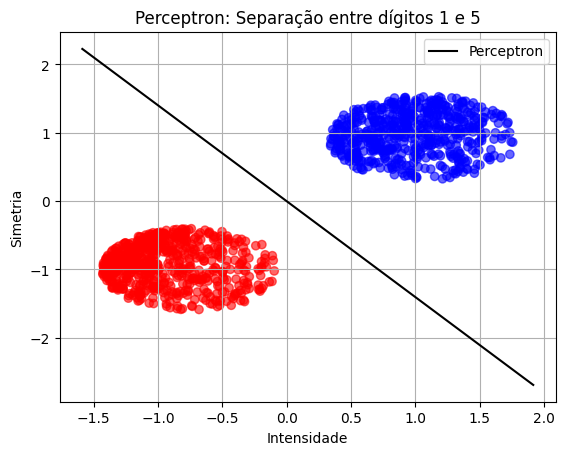

In [ ]:
# Normalizar
scaler = StandardScaler()
X = scaler.fit_transform(train[['intensidade', 'simetria']].values)
y = train['label'].apply(lambda x: 1 if x == 1 else -1).values

# Treinar
modelo = Perceptron()
modelo.fit(X, y)

# Plotar dados
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.6)


plot_reta_decisao_perceptron(modelo, 'black', 'Perceptron')
plt.xlabel("Intensidade")
plt.ylabel("Simetria")
plt.legend()
plt.title("Perceptron: Separação entre dígitos 1 e 5")
plt.grid(True)
plt.show()